In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('dataset_1.csv', index_col = 0)
df.head()

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561


In [37]:
X = df.values
X

array([[ 0.68026725, -0.01634235],
       [ 3.80951844,  0.79848348],
       [-1.6613724 , -0.57766695],
       ...,
       [-5.86152028,  3.06842556],
       [-5.01893361,  3.11090369],
       [-6.79933099,  2.08232074]])

## K-means pour 2 centroides

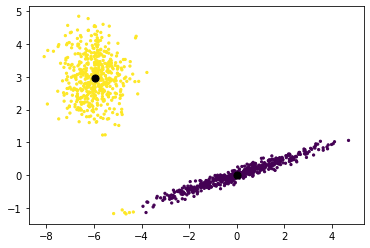

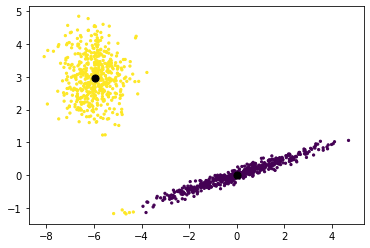

In [28]:
def generate_two_centroid(X):
    """
    retourn les coordinées d'un centroid choisit aléatoirement dans X
    dist = np.linalg.norm(X-centroid1)
    """
    indice1, indice2 = np.random.choice(X.shape[0], size = 2, replace = False)
    
    centroid1, centroid2 = X[indice1], X[indice2]
    return centroid1, centroid2

def generate_label(X, centroid1, centroid2):
    """
    Pour chaque centroid, retourne la distance est calculé
    retourn le label de chaque point : une array qui va être un vecteur (array numpy one dimension), [0,1,0,1,0,1,1,0,1,0....]
    """
    def compute_d(X, centroid):
        dist = (X - centroid)**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        return dist
    d1, d2 = compute_d(X, centroid1), compute_d(X, centroid2)
    label = np.where(d1<d2, 0, 1)
    return label

def plot_graph(X, label, centroid1, centroid2):
    """
    retourn rien, affiche le graphe avec en coloration différente les clusters

    """
    plt.scatter(X[:,0], X[:,1], s=5, c=label)
    plt.scatter(centroid1[0], centroid1[1], c="black", s=50)
    plt.scatter(centroid2[0], centroid2[1], c="black", s=50)
    plt.show()
    
def compute_new_cendroid_position(X, label):
    """
    retourn la position des nouveaux cenroids

    """
    new_centroid1, new_centroid2 = np.mean(X[label==0], axis = 0), np.mean(X[label==1], axis = 0)
    return new_centroid1, new_centroid2




centroid1, centroid2 = generate_two_centroid(X)
label = generate_label(X, centroid1, centroid2)

new_centroid1, new_centroid2 = compute_new_cendroid_position(X, label)

while (np.round(new_centroid1,3) != np.round(centroid1,3)).all() and (np.round(new_centroid2,3) != np.round(centroid2,3)).all():
    centroid1, centroid2 = new_centroid1, new_centroid2
    label = generate_label(X, centroid1, centroid2)
    new_centroid1, new_centroid2 = compute_new_cendroid_position(X, label)
    plot_graph(X, label, centroid1, centroid2)



## K-means généraliser à n centroids

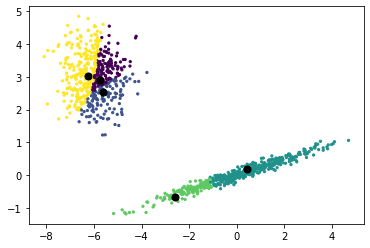

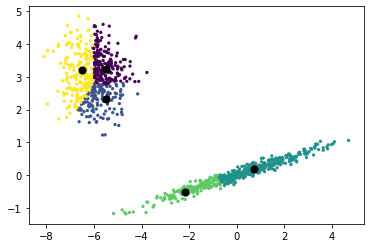

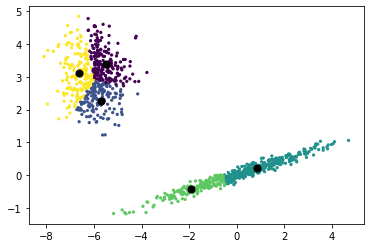

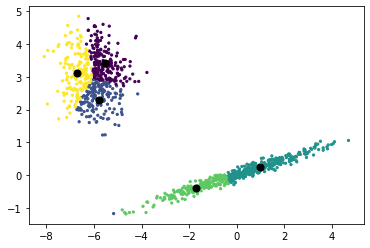

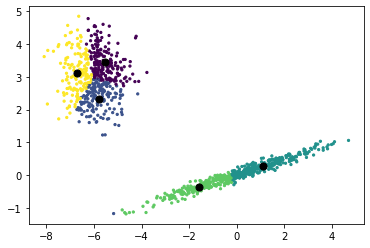

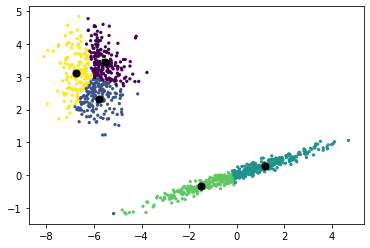

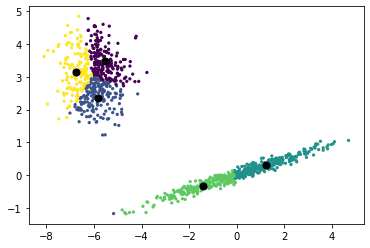

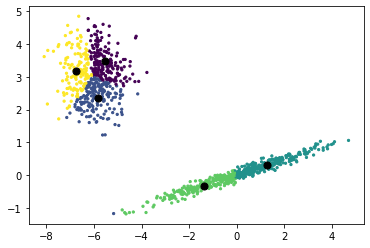

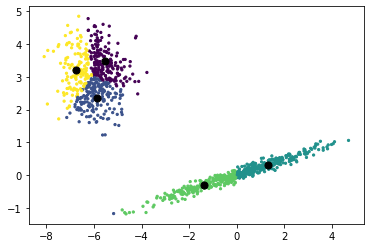

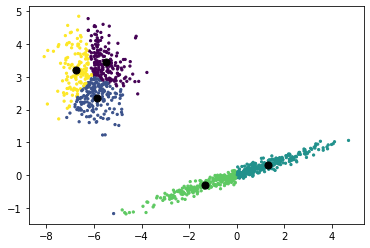

In [29]:
def generate_n_centroid(X, n_centroid):
    """
    retourn les coordinées d'un centroid choisit aléatoirement dans X
    dist = np.linalg.norm(X-centroid1)
    """
    indices = np.random.choice(X.shape[0], size = n_centroid, replace = False)
    
    centroids = X[indices]
    return centroids

def generate_label(X, centroids):
    """
    Pour chaque centroid, retourne la distance est calculé
    retourn le label de chaque point : une array qui va être un vecteur (array numpy one dimension), [0,1,0,1,0,1,1,0,1,0....]
    """
    def compute_d(X, centroid):
        dist = (X - centroid)**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        return dist
    list_dist = [compute_d(X, centroid) for centroid in centroids]
    numpy_dist = np.asarray(list_dist, dtype=np.float32).transpose()
    label = np.argmin(numpy_dist, axis=1)
    return label
def plot_graph(X, label, centroids):
    """
    retourn rien, affiche le graphe avec en coloration différente les clusters

    """
    plt.scatter(X[:,0], X[:,1], s=5, c=label)
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], c="black", s=50)
    plt.show()
def compute_new_cendroid_position(X, label, n_centroid):
    """
    retourn la position des nouveaux cenroids

    """
    new_cent = [np.mean(X[label==i], axis = 0) for i in range(n_centroid)]
    new_centroids = np.asarray(new_cent)
    return new_centroids

n_centroid = 5
centroids = generate_n_centroid(X, n_centroid)
label = generate_label(X, centroids)
plot_graph(X, label, centroids)
new_centroids = compute_new_cendroid_position(X, label, n_centroid)
new_centroids

while (centroids != new_centroids).all():
    centroids = new_centroids
    label = generate_label(X, centroids)
    new_centroids= compute_new_cendroid_position(X, label, n_centroid)
    plot_graph(X, label, centroids)


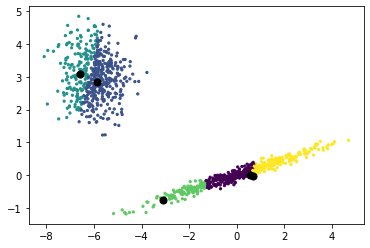

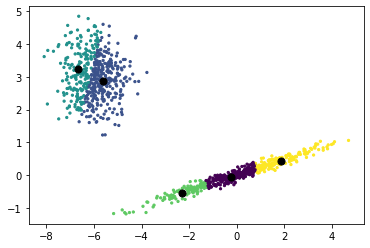

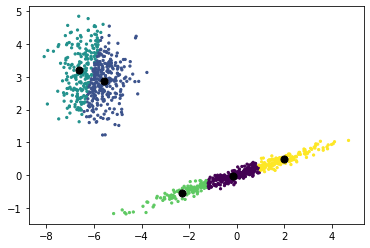

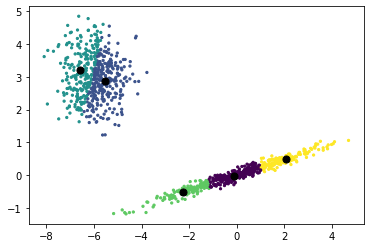

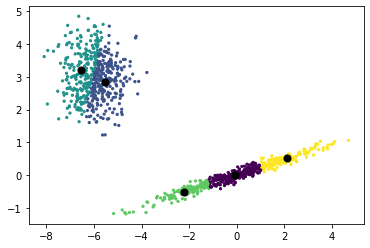

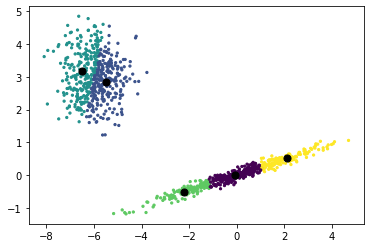

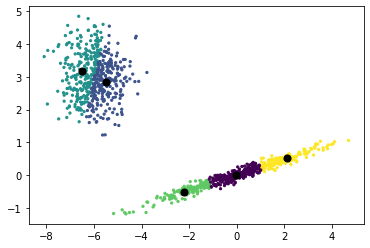

In [33]:
class Kmeans:
    def __init__(self, X):
        self.X = X
        
    def generate_n_centroid(self, n_centroid):
        """
        retourn les coordinées d'un centroid choisit aléatoirement dans X
        dist = np.linalg.norm(X-centroid1)
        """
        indices = np.random.choice(self.X.shape[0], size = n_centroid, replace = False)

        centroids = self.X[indices]
        return centroids

    def generate_label(self, centroids):
        """
        Pour chaque centroid, retourne la distance est calculé
        retourn le label de chaque point : une array qui va être un vecteur (array numpy one dimension), [0,1,0,1,0,1,1,0,1,0....]
        """
        def compute_d(centroid):
            dist = (self.X - centroid)**2
            dist = np.sum(dist, axis=1)
            dist = np.sqrt(dist)
            return dist
        
        list_dist = [compute_d(centroid) for centroid in centroids]
        numpy_dist = np.asarray(list_dist, dtype=np.float32).transpose()
        label = np.argmin(numpy_dist, axis=1)
        return label
    
    def plot_graph(self, label, centroids):
        """
        retourn rien, affiche le graphe avec en coloration différente les clusters

        """
        plt.scatter(self.X[:,0], self.X[:,1], s=5, c=label)
        for centroid in centroids:
            plt.scatter(centroid[0], centroid[1], c="black", s=50)
        plt.show()
        
    def compute_new_cendroid_position(self, label, n_centroid):
        """
        retourn la position des nouveaux cenroids

        """
        new_cent = [np.mean(self.X[label==i], axis = 0) for i in range(n_centroid)]
        new_centroids = np.asarray(new_cent)
        return new_centroids
    
km = Kmeans(X)
n_centroid = 5
centroids = km.generate_n_centroid(n_centroid)
label = km.generate_label(centroids)
km.plot_graph(label, centroids)
new_centroids = km.compute_new_cendroid_position(label, n_centroid)
new_centroids

while (centroids != new_centroids).all():
    centroids = new_centroids
    label = km.generate_label(centroids)
    new_centroids= km.compute_new_cendroid_position(label, n_centroid)
    km.plot_graph(label, centroids)